In [1]:
#pip install selenium

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep

def get_feedbacks():
    driver = webdriver.Chrome() 
    driver.get("https://play.google.com/store/games?device=windows&pli=1")
    driver.find_element("xpath", "//i[text()='search']").click()
    sleep(2)
    driver.find_element("xpath", "//input[@aria-label='Search Google Play']").send_keys("Barclays")
    sleep(2)
    driver.find_element("xpath", "//b[text()='barclays']").click()
    sleep(2)
    driver.find_element("xpath", "//div[@class='g1rdde']/..//../..//img[1]").click()
    sleep(2)
    driver.find_element("xpath", "//h2[text()='Ratings and reviews']/../..//i[text()='arrow_forward']").click()
    sleep(2)
    name=driver.find_elements("xpath", "//div[@role='dialog']//div[@class='RHo1pe']/div[1]")
    
    print(len(name))
    
    feedbacks=[]
    for individual_text in name:
       # print("--------------")
       # print(individual_text.text)
        individual_feedback=individual_text.text
       # print("--------------")
        individual_text.size
        feedbacks.append(individual_feedback)
    
   # print(feedbacks)
    
    driver.quit()
    return feedbacks

def get_all_feedbacks():
    driver = webdriver.Chrome() 
    driver.get("https://play.google.com/store/games?device=windows&pli=1")
    driver.find_element("xpath", "//i[text()='search']").click()
    sleep(2)
    driver.find_element("xpath", "//input[@aria-label='Search Google Play']").send_keys("Barclays")
    sleep(2)
    driver.find_element("xpath", "//b[text()='barclays']").click()
    sleep(2)
    driver.find_element("xpath", "//a[contains(@href,'barclaysmobilebanking')]").click()
    sleep(2)
    driver.find_element("xpath", "//h2[text()='Ratings and reviews']/../..//i[text()='arrow_forward']").click()
    sleep(2)
    # Find the popup div element
    popup_div = driver.find_element(By.XPATH, "//div[@role='dialog']//div[@class='RHo1pe']/div")
    
    # Scroll and collect feedbacks
    feedbacks = []
    last_height = driver.execute_script("return arguments[0].scrollHeight", popup_div)
    while True:
        # Find all the elements within the popup
        name_elements = driver.find_elements(By.XPATH, "//div[@role='dialog']//div[@class='RHo1pe']/div[1]")
        
        # Collect feedback texts
        for individual_text in name_elements:
            individual_feedback = individual_text.text
            if individual_feedback not in feedbacks:  # To avoid duplicates
                feedbacks.append(individual_feedback)
    
        # Scroll down within the popup div
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", popup_div)
    
        # Wait for new elements to load
        sleep(2)  # adjust time as necessary based on your page load speed
    
        # Calculate new scroll height and compare with the last scroll height
        new_height = driver.execute_script("return arguments[0].scrollHeight", popup_div)
        if new_height == last_height:
            break  # If heights are the same, exit the loop
        last_height = new_height
    
    # Print the number of feedbacks collected
    print(len(feedbacks))
    
    driver.quit()
    return feedbacks



review_text=get_all_feedbacks()
len(review_text)

20


20

In [3]:
import pandas as pd
#GET FEEDBACK REVIEW FROM GOOGLE PLAY STORE FOR "BARCLAYS ANDROID APP"
#review_text=get_feedbacks()
review_text=["The app is very good to use","Very difficult to switch to another device, even if you have the old one present. It crashed during the process, failed to generate an activation code, failed to read the debit card and then forced me to photo my drivers license and record a video and still didn't complete the setup. Frustrating bad. That said, when it is setup it is adequate at providing basic banking functionality.", "Hilariously bad banking app. If you view a different app while doing something (say to coppy bank details or whatever) this app cancels whatever you were trying to do and either closes or returns to the home screen. You can't long-press to paste either so you need to make use of your phone's keyboard app and copy everything you need to the clipboard in advance. It's a comedy bad user experience.", "Very buggy. Constant 'something went wrong' - it won't be worth paying for Blue Rewards at this rate because 'something went wrong' with cashback, 'something went wrong' with appletv. Not seen much going right... App also closes or goes back whenever you change to another screen which is frustrating and other banking apps don't do this. It has got even worse. I signed up for the current account switch, now when I open the app it doesn't seem to remember the account i just opened", 'Stay away from this bank. You will regret to be a customer of Barclays every time you need to get a service. So secure that is annoying. Can not copy entered text from the input view, can not past the text. When switch to another app and come back input is erased and chat is lost! No ability to edit text after it is sent. Horrible application and horrible service. Representatives asking the same questions every time. In Barclays UK I had the worst banking experience in my life.', 'Very easy to use, works well, no problems. I love the tips that link you to the website (eg suggestion about saving) as well as how easy it is to find all the info about each product. Very recommended! I faced some problems in 2019 as the app was not compatible with the mobile phone (Huawei P9 Lite). Apart with that specific phone, no problems at all', "Just ok. It's too long to log in. - Payees keep dropping from the trusted payee list. It's very annoying! I pay someone different amounts every months and his name and details keep dropping off the list. Smart Investor side of the app is basic and doesn't have all the features of online banking. It also doesn't compare well with other investment apps. Cards control feature very basic too. App could be much improved, but I haven't seen any significant change for the past few years.", "Excellent app!! Can't recall when was last time I went to the bank. Would be great if we could transfer money to Africa directly from this app. I absolutely love this app, i have been using it for years, and i have zero complaints regarding it. It saves you time to go queue up in the bank..just excelente app! Is it possible to enable customers to delete the list of families and friends' money transferred lists, please? Overall, excellent! Great app", "Easy and straight forward to use. Quicker than waiting for lap top to boot up. Better if not in and on the go and partner needs money straight away. But not all payee list shows up as on lap top?only down side is when you make a transfer or payment and wish to make another your balance doesn't update until you log out and back in again? ???since last reviewed. Balance after making transfer or payment still doesn't show new balance until you log out and in again. That's only issue. But great app.", "Excellent app, can do everything I need to do at a touch of a button safely and quickly, including paying bills,without having to visit a bank. I also like the instant notification each time money goes out of the account so you can check for fraud. It's just so much more convenient. This makes up for the fact somewhat that there is no longer a Barclays in our town. The only problem comes when having to pay in the odd cheque as the app doesn't work very well when trying to photo a cheque.", 'The entire partner finance section just crashes the entire app any time you try to do anything. Sometimes even just opening the section of the app is enough to crash it. On the rare occasion I actually make it far enough to make a manual payment the notification to authorise a payment from my account takes the app away from the payment screen, and resets all progress! I literally cannot make a payment without using a different bank!', 'Have found it very useful, and easy to transfer funds either between accounts or to a 3rd party. Pleasantly surprised, as I had been very cautious about online banking of any sort. One aspect that is a pain in the neck is paying in cheques - I have repeatedly failed to persuade the app to take a photo of the cheque concerned! The only suggestion I have been given is to delete the app and reinstall - I have no other equipment on which I can access my accounts, so am unwilling to do this!', "I didn't want to do online banking, but due to my local bank closing, I had no choice. I should have changed years ago! Everything is very easy. No queuing or going out in bad weather BLISS. I'm a pensioner and was very wary, but you look after my account securely. My only gripe... if you stop my card for any reason, a notification would be very helpful instead of me having to go through all the security system to find out why.", "Truly dreadful experience. It may actually worse than HSBC's, but I won't know until I finally get logged in. (I tried to enable biometric authentication, but it locked me out completely instead.) I don't remember the experience being this bad, back in 1999, when I first started using online banking. (Yup-I'm an oldie, whose been programming since 1977. I've no idea what the programmers of today are being taught, but I'm not impressed :-(", "Minimise the app & it shuts down. The log out function is well hidden under 'other' tab. Update July '24. Opened a Barclay's bank account in order to take advantage of their switch offer. Downloaded app, opened on line banking. Transfered money in via app, then attempted to pay a bill via the app. Not possible for up to 10 days via the app. Attempted to access account via on line banking. You need the app to verify security. But the app features aren't available for up to 10 days. Crazy.", "I am very pleased to see that Barclays has improved the facility for depositing cheques on the App.I am housebound and can't get to a branch, so it is imperative that the App's functions enable me to make full use of my Barclays banking from home. So full marks to Barclays for this improvement. One other problem has arisen in the last few months. Although in theory it is good to verify payments to third parties, the verification process takes far too long and by then transactions get cancelled.", "I like the app in general, but there is just one thing that niggles at the moment - paying in cheques. I don't get an error message like a lot of people seem to be getting; instead, my phone camera simply refuses to take a photo of the cheque I want to pay in no matter the background, lighting, flash status, or alignment. Nothing seems to work. Otherwise, a great little app. - I can now pay in cheques withe the phone camera.", "Very little information or options available, can't register a card, amend details etc. But you cannot access your account online, so the only way to get a balance, other than phoning, is to install the app. Tried to pay off the balance on my account from my bank, had to authorise on their app. As soon as you leave the Barclays app it closes and you have to log in again, with the payment screen reset. Absolutely impossible to get it done!", 'Normally a great app, but last couple of days it will not work. I log in and it throws me straight back out and takes me to the log in again. I have tried several things such as updating the software on my phone, updated the app, cleared cache, cleared data and reinstalled app which then required me to register all over again. I have switched from WiFi to my phone data, restarted my phone and closed a couple of tabs in my Internet browser but nothing is working. Web status saying no app issues.', 'Generally good. Any problems I have arise from me getting confused. Edit :- now finding this app easy to use. Just one thing I cannot make a payment later eg for a credit card due date. Payment must always be immediate (unless I am missing something). Since found that I can make a payment for a later date so happy with that.', "Iv used this for nearly as long as it has been out, with all the improvements since it first started. This application is a massive help with everyday banking. Managing your money could not be easier. However from the 4th Sep you now have to pay to have a savings account.. odd.. there are other banks that dont do this with higher returns, for the first time ever myself and others are starting to look elsewhere. Blue rewards.. not sure it's going to be worth it! Apple TV.. rubbish. You're a bank!"]
#print(review_text)
df_reviews = pd.DataFrame(review_text)
print(df_reviews)

                                                    0
0                         The app is very good to use
1   Very difficult to switch to another device, ev...
2   Hilariously bad banking app. If you view a dif...
3   Very buggy. Constant 'something went wrong' - ...
4   Stay away from this bank. You will regret to b...
5   Very easy to use, works well, no problems. I l...
6   Just ok. It's too long to log in. - Payees kee...
7   Excellent app!! Can't recall when was last tim...
8   Easy and straight forward to use. Quicker than...
9   Excellent app, can do everything I need to do ...
10  The entire partner finance section just crashe...
11  Have found it very useful, and easy to transfe...
12  I didn't want to do online banking, but due to...
13  Truly dreadful experience. It may actually wor...
14  Minimise the app & it shuts down. The log out ...
15  I am very pleased to see that Barclays has imp...
16  I like the app in general, but there is just o...
17  Very little information 

<H1>TEXT PREPROSSING</H1>

<pre>
<b>Steps Explanation:</b>
<b>Step :1</b> Convert to Lowercase: Ensure uniformity by converting all text to lowercase.
<b>Step :2</b> Remove URLs: Remove any URLs present in the text.
<b>Step :3</b> Remove User References and Hashtags: Clean up the text by removing user mentions (e.g., @username) and hashtags.
<b>Step :4</b> Remove Punctuation and Numbers: Strip out punctuation and numbers.
<b>Step :5</b> Remove Extra Whitespace: Clean up any extra whitespace for better tokenization.
<b>Step :6</b> Tokenize Text: Break the text into individual words.
<b>Step :7</b> Remove Stopwords: Remove common words that don't add significant meaning (e.g., "the", "is").
<b>Step :8</b> Lemmatize Tokens: Reduce words to their base or root form (e.g., "running" to "run").
<b>Step :9</b> Join Tokens Back to String: Combine the tokens back into a single string for each text entry.
</pre>

<h3>1. PREPORCESSING</h3>

In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer

# Download necessary resources
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

val=[]

def preprocess_text(text):
   
    i=0
    for individual_text in review_text:
    
        i=i+1
       
        #print("**************TEXT PREPROCESSING IN NLP*****************")
        #print(i)
        #print("**************ORIGINAL TEXT*****************")
        #print(individual_text)
        
        # Step :1 Convert to Lowercase: Ensure uniformity by converting all text to lowercase.
        text=individual_text.lower()
    
        #Step :2 Remove URLs: Remove any URLs present in the text.
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
        #Step :3 Remove User References and Hashtags: Clean up the text by removing user mentions (e.g., @username) and hashtags.
        # Remove user @ references and '#'
        text = re.sub(r'\@\w+|\#', '', text)
    
        #Step :4 Remove Punctuation and Numbers: Strip out punctuation and numbers.
        text = re.sub(r'[^\w\s]', '', text)
    
        #Step :5 Remove Extra Whitespace: Clean up any extra whitespace for better tokenization.
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        #print("PREPROSSED TEXT")
        #print(text)
        
        #print("**************TOKINIZER*****************")
           
    
        #Step :6 Tokenize Text: Break the text into individual words.
        # Tokenize text import (from nltk.tokenize import word_tokenize)
        tokens = word_tokenize(text)
        #print(tokens)
    
        #Step :7 Remove Stopwords: Remove common words that don't add significant meaning (e.g., "the", "is").
        # Remove stopwords (from nltk.corpus import stopwords) 
        filtered_tokens = [word for word in tokens if word not in stop_words]
        #print("**********************FILTERED TOKEN AFTER STOP WATCH**************")
       # print(filtered_tokens)
    
        # Stem words
        #print("**********************STEMMING**************")
        stemmer = PorterStemmer()
        stemmed_words = [stemmer.stem(word) for word in tokens]
       # print(stemmed_words)
    
        #Step :8 Lemmatize Tokens: Reduce words to their base or root form (e.g., "running" to "run").
         # Lemmatize tokens
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
       # print("**********************LEMMATIZE**************")
      #  print(lemmatized_tokens)
    
        #Step :9 Join Tokens Back to String: Combine the tokens back into a single string for each text entry.
        # Join tokens back to string
        processed_text = ' '.join(lemmatized_tokens)
        #print("**********************ORIGINAL TEXT AFTER PREPROCESSING**************")
        #print(processed_text)
        val.append(processed_text)

    return val

# Print preprocessed text
#for i, text in enumerate(processed_text):
#    print(f"Original Text {i+1}: {review_text[i]}")
#    print(f"Preprocessed Text {i+1}: {text}\n")


In [8]:
Text_12=preprocess_text(review_text)


In [9]:
#pip install TextBlob

In [10]:
from textblob import TextBlob

def get_sentiment_textblob(processed_text):
    analysis = TextBlob(processed_text)
    #print(analysis.sentiment)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

for values in Text_12:
    if(get_sentiment_textblob(values)=='negative'):
        #print(f"Original Text --> {values}: {get_sentiment_textblob(values)}")
        print(f"Original Text --> {values}: {get_sentiment_textblob(values)}")
        print("=================")


Original Text --> very difficult to switch to another device even if you have the old one present it crashed during the process failed to generate an activation code failed to read the debit card and then forced me to photo my driver license and record a video and still didnt complete the setup frustrating bad that said when it is setup it is adequate at providing basic banking functionality: negative
Original Text --> hilariously bad banking app if you view a different app while doing something say to coppy bank detail or whatever this app cancel whatever you were trying to do and either close or return to the home screen you cant longpress to paste either so you need to make use of your phone keyboard app and copy everything you need to the clipboard in advance it a comedy bad user experience: negative
Original Text --> very buggy constant something went wrong it wont be worth paying for blue reward at this rate because something went wrong with cashback something went wrong with app

<h5>2. Custom words from TextBold</h5>

In [12]:
#pip install pattern

In [13]:
custom_lexicon = {
    'positive': {
        'good': 0.7,
        'great': 0.8,
        'excellent': 0.9,
        'amazing': 1.0,
        'wonderful': 0.9
    },
    'negative': {
        'bad': -0.7,
        'terrible': -0.8,
        'horrible': -0.9,
        'poor': -0.5,
        'worst': -1.0
    }
}

positive_val=0
def custom_sentiment_analysis(text, lexicon):
    words = text.lower().split()
    polarity_score = 0
    for word in words:
        if word in lexicon['positive']:
            polarity_score += lexicon['positive'][word]
        elif word in lexicon['negative']:
            polarity_score += lexicon['negative'][word]
    return polarity_score

# Example usage
#text = "The product is amazing but the service is horrible."
#score = custom_sentiment_analysis(text, custom_lexicon)
#print(f"Custom polarity score: {score}")

#print(positive_val)

for values_custom in Text_12:
   # if(custom_sentiment_analysis(values_custom,custom_lexicon)=='negative'):
        #print(f"Original Text --> {values_custom}: {custom_sentiment_analysis(values_custom,custom_lexicon)}")
        #print("=================")
        print(f" {custom_sentiment_analysis(values_custom,custom_lexicon)}")
       


 0.7
 -0.7
 -1.4
 0
 -2.8
 0
 0
 3.4000000000000004
 0.8
 0.9
 0
 0
 -0.7
 -0.7
 0
 0.7
 0.8
 0
 0.8
 0.7
 0


In [75]:
feedbacks=["neutral","Positive","negative","negative","negative","negative","negative","negative","negative","negative","negative","Positive","Positive","Positive","Positive","Positive","negative","negative","neutral","neutral"]

def get_overall_feedback(feedbacks):
    
    positive_count=0
    negative_count=0
    neutral_count=0
    
    for ind in feedbacks:
        if(ind.lower()=="positive"):
            positive_count=positive_count+1
        elif(ind.lower()=="negative"):
            negative_count=negative_count+1
        else:
            neutral_count=neutral_count+1
        
        #print(ind.lower())
        sentiment_val=""
        if(positive_count>=negative_count and positive_count>=neutral_count):
            sentiment_val="positive"        
        elif(negative_count>=positive_count and negative_count>=neutral_count):
            sentiment_val="negative"    
        else:
            sentiment_val="neutral"    
            
    #print(positive_count)
    #print(negative_count)
    #print(neutral_count)
    #print(sentiment_val)
    keys = ['PositiveFeedbackCount', 'NegativeFeedbackCount', 'NeutralFeedbackCount','OverallFeedback']
    values = [positive_count, negative_count, neutral_count,sentiment_val]

    my_dict = {}
    
    for key, value in zip(keys, values):
        my_dict[key] = value
    
    #print(my_dict)
    return my_dict
get_overall_feedback(feedbacks)

{'PositiveFeedbackCount': 6,
 'NegativeFeedbackCount': 11,
 'NeutralFeedbackCount': 3,
 'OverallFeedback': 'negative'}

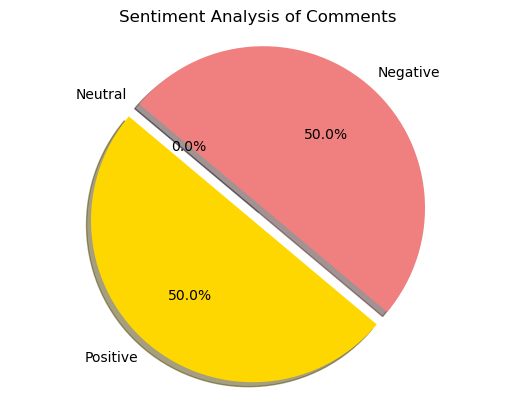

In [9]:
import matplotlib.pyplot as plt
import io
import base64
# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [10, 10, 0]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice (Positive)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)



plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Analysis of Comments')
plt.show()